<a href="https://colab.research.google.com/github/galib96/gnn-handling-molecular-data-esol/blob/main/GNN_for_handling_moelcular_data_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing dependencies. Code Taken from: <p> https://colab.research.google.com/drive/16GBgwYR2ECiXVxA1BoLxYshKczNMeEAQ?usp=sharing#scrollTo=YnRp-W6y5K1f </p>

In [1]:
# Enforce pytorch version 1.6.0
import torch
if torch.__version__ != '1.6.0':
  !pip uninstall torch -y
  !pip uninstall torchvision -y
  !pip install torch
  !pip install torchvision

# Check pytorch version and make sure you use a GPU Kernel
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"
!python --version
!nvidia-smi

Found existing installation: torch 1.11.0+cu113
Uninstalling torch-1.11.0+cu113:
  Successfully uninstalled torch-1.11.0+cu113
Found existing installation: torchvision 0.12.0+cu113
Uninstalling torchvision-0.12.0+cu113:
  Successfully uninstalled torchvision-0.12.0+cu113
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 776.3 MB 19 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.6.3 requires torchvision>=0.8.2, which is not installed.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.12.0 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.12.0 which is incompatible.
fastai 2.6.3 requires torch<1.12,>=1.7.0, but you have torch 1.12.0 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.1 MB 1.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.6.3 requires torch<1.12,>=1.7.0, but you have torch 1.12.0 which is incompatible.
1.12.0+cu102
10.2
Python 3.7.13
Fri Jul  1 01:40:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+

In [1]:
#@title
# Install rdkit
import sys
import os
import requests
import subprocess
import shutil
from logging import getLogger, StreamHandler, INFO
 
 
logger = getLogger(__name__)
logger.addHandler(StreamHandler())
logger.setLevel(INFO)
 
 
def install(
        chunk_size=4096,
        file_name="Miniconda3-latest-Linux-x86_64.sh",
        url_base="https://repo.continuum.io/miniconda/",
        conda_path=os.path.expanduser(os.path.join("~", "miniconda")),
        rdkit_version=None,
        add_python_path=True,
        force=False):
    """install rdkit from miniconda
    ```
    import rdkit_installer
    rdkit_installer.install()
    ```
    """
 
    python_path = os.path.join(
        conda_path,
        "lib",
        "python{0}.{1}".format(*sys.version_info),
        "site-packages",
    )
 
    if add_python_path and python_path not in sys.path:
        logger.info("add {} to PYTHONPATH".format(python_path))
        sys.path.append(python_path)
 
    if os.path.isdir(os.path.join(python_path, "rdkit")):
        logger.info("rdkit is already installed")
        if not force:
            return
 
        logger.info("force re-install")
 
    url = url_base + file_name
    python_version = "{0}.{1}.{2}".format(*sys.version_info)
 
    logger.info("python version: {}".format(python_version))
 
    if os.path.isdir(conda_path):
        logger.warning("remove current miniconda")
        shutil.rmtree(conda_path)
    elif os.path.isfile(conda_path):
        logger.warning("remove {}".format(conda_path))
        os.remove(conda_path)
 
    logger.info('fetching installer from {}'.format(url))
    res = requests.get(url, stream=True)
    res.raise_for_status()
    with open(file_name, 'wb') as f:
        for chunk in res.iter_content(chunk_size):
            f.write(chunk)
    logger.info('done')
 
    logger.info('installing miniconda to {}'.format(conda_path))
    subprocess.check_call(["bash", file_name, "-b", "-p", conda_path])
    logger.info('done')
 
    logger.info("installing rdkit")
    subprocess.check_call([
        os.path.join(conda_path, "bin", "conda"),
        "install",
        "--yes",
        "-c", "rdkit",
        "python==3.7.3",
        "rdkit" if rdkit_version is None else "rdkit=={}".format(rdkit_version)])
    logger.info("done")
 
    import rdkit
    logger.info("rdkit-{} installation finished!".format(rdkit.__version__))
 
 
if __name__ == "__main__":
    install()

add /root/miniconda/lib/python3.7/site-packages to PYTHONPATH
python version: 3.7.13
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit
done
rdkit-2020.09.1 installation finished!


In [2]:
# If something breaks in the notebook it is probably related to a mismatch between the Python version, CUDA or torch
import torch
pytorch_version = f"torch-{torch.__version__}.html"
!pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-1.12.0+cu102.html
     |████████████████████████████████| 8.0 MB 1.3 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.0+cu102.html
     |████████████████████████████████| 2.9 MB 1.3 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.0+cu102.html
     |████████████████████████████████| 1.4 MB 739 kB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.0+cu102.html
     |████████████████████████████████| 633 kB 564 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 407 kB 5.1 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.4-py3-none-any.whl size=616603 sha256=733c5f676d9dcd165cc327917f89d1283dc22cd7a1394d9b41a4289dd955913d
  Stored in directory: /root/.cache/pip/wheels/18/a6/a4/ca18c3051fcead866fe7b85700ee2240d883562a1bc70ce421
Successfully built torch-geometric


In [3]:
import rdkit
from torch_geometric.datasets import MoleculeNet

# Load the ESOL dataset
data = MoleculeNet(root=".", name="ESOL")
data

Processing...
Done!


ESOL(1128)

In [ ]:
# Investigating the dataset
print("Dataset type: ", type(data))
print("Dataset features: ", data.num_features)
print("Dataset target: ", data.num_classes)
print("Dataset length: ", data.len)
print("Dataset sample: ", data[0])
print("Sample  nodes: ", data[0].num_nodes)
print("Sample  edges: ", data[0].num_edges)

Dataset type:  <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
Dataset features:  9
Dataset target:  734
Dataset length:  <bound method InMemoryDataset.len of ESOL(1128)>
Dataset sample:  Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], y=[1, 1], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ')
Sample  nodes:  32
Sample  edges:  68


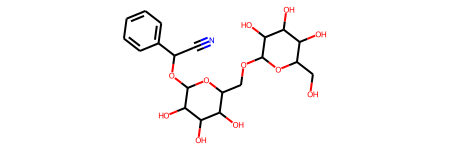

In [5]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
molecule = Chem.MolFromSmiles(data[0]["smiles"])
molecule

In [6]:
# Investigating the features
# Shape: [num_nodes, num_node_features]
data[0].x

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

In [7]:
# Investigating the edges in sparse COO format
# Shape [2, num_edges]
data[0].edge_index.t()

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 2, 30],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 4, 26],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 24],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 20],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [11, 14],
        [12, 11],
        [12, 13],
        [13, 12],
        [14, 11],
        [14, 15],
        [14, 19],
        [15, 14],
        [15, 16],
        [16, 15],
        [16, 17],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 19],
        [19, 14],
        [19, 18],
        [20,  9],
        [20, 21],
        [20, 22],
        [21, 20],
        [22, 20],
        [22, 23],
        [22, 24],
        [23, 22],
        [24,  7],
        [24, 22],
        [24, 25],
        [2

In [10]:
data[0].y

tensor([[-0.7700]])

In [12]:
import torch
from torch.nn import Linear, Dropout
import torch.nn.functional as ftl
from torch_geometric.nn import BatchNorm
from torch_geometric.nn import GCNConv, TopKPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
embed_size = 256

class GCN(torch.nn.Module):
    def __init__(self):
        # parent
        super(GCN, self).__init__()
        torch.manual_seed(42)

        # GCN layers
        self.initial_conv = GCNConv(data.num_features, embed_size)
        self.conv1 = GCNConv(embed_size, embed_size)
        self.conv2 = GCNConv(embed_size, embed_size)
        self.conv3 = GCNConv(embed_size, embed_size)
        self.conv4 = GCNConv(embed_size, embed_size)
        self.conv5 = GCNConv(embed_size, embed_size)

        # output layer
        self.output = Linear(embed_size*2, data.num_classes)

    def forward(self, x, edge_index, batch_index):
        # first convolution layer
        hidden = self.initial_conv(x, edge_index)
        hidden = ftl.tanh(hidden)

        # Other convolutional layers
        hidden = self.conv1(hidden, edge_index)
        hidden = ftl.tanh(hidden)
        hidden = BatchNorm(hidden)
        hidden = ftl.dropout(hidden, p=0.2)
        hidden = self.conv2(hidden, edge_index)
        hidden = ftl.tanh(hidden)
        hidden = BatchNorm(hidden)
        hidden = ftl.dropout(hidden, p=0.15)
        hidden = self.conv3(hidden, edge_index)
        hidden = ftl.tanh(hidden)
        hidden = BatchNorm(hidden)
        hidden = ftl.dropout(hidden, p=0.1)
        hidden = self.conv4(hidden, edge_index)
        hidden = ftl.tanh(hidden)
        hidden = BatchNorm(hidden)
        hidden = ftl.dropout(hidden, p=0.05)
        hidden = self.conv5(hidden, edge_index)
        hidden = ftl.tanh(hidden)

        # Global pooling
        hidden = torch.cat([gmp(hidden, batch_index), gap(hidden, batch_index)], dim=1)

        # final classifier
        output = self.output(hidden)

        return output, hidden

model = GCN()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

GCN(
  (initial_conv): GCNConv(9, 256)
  (conv1): GCNConv(256, 256)
  (conv2): GCNConv(256, 256)
  (conv3): GCNConv(256, 256)
  (conv4): GCNConv(256, 256)
  (conv5): GCNConv(256, 256)
  (output): Linear(in_features=512, out_features=734, bias=True)
)
Number of parameters:  708062


In [13]:
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

# RMSE
loss_fun = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Utilize GPU for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# put data in data loader
data_size = len(data)
graphs_per_batch = 128
loader = DataLoader(data[:int(data_size * 0.8)], 
                    batch_size=graphs_per_batch, shuffle=True)
test_loader = DataLoader(data[int(data_size * 0.8):], 
                         batch_size=graphs_per_batch, shuffle=True)

def train(data):
    # Enumerate over data
    for batch in loader:

        batch.to(device)
        optimizer.zero_grad()

        # Pass the node features info
        pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch) 

        # Calculating the loss and gradients
        loss = torch.sqrt(loss_fun(pred, batch.y))       
        loss.backward()  

        optimizer.step()

    return loss, embedding

print("Training will start...")
losses = []
ep = 5000
for epoch in range(ep+1):
    loss, h = train(data)
    losses.append(loss)
    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Train Loss {loss}")
    elif epoch == ep:
        print(f"Epoch {epoch} | Train Loss {loss}")

Training will start...
Epoch 0 | Train Loss 1.655456304550171
Epoch 100 | Train Loss 0.7378121614456177
Epoch 200 | Train Loss 0.6628007888793945
Epoch 300 | Train Loss 0.6157793402671814
Epoch 400 | Train Loss 0.4790579378604889
Epoch 500 | Train Loss 0.6734787821769714
Epoch 600 | Train Loss 0.5623463988304138
Epoch 700 | Train Loss 0.4885372817516327
Epoch 800 | Train Loss 1.4096837043762207
Epoch 900 | Train Loss 0.7257806062698364
Epoch 1000 | Train Loss 0.29615306854248047
Epoch 1100 | Train Loss 0.2579258978366852
Epoch 1200 | Train Loss 0.2821653187274933
Epoch 1300 | Train Loss 0.2691676914691925
Epoch 1400 | Train Loss 0.4005942940711975
Epoch 1500 | Train Loss 0.30648288130760193
Epoch 1600 | Train Loss 0.18040357530117035
Epoch 1700 | Train Loss 0.2893927991390228
Epoch 1800 | Train Loss 0.2847399413585663
Epoch 1900 | Train Loss 0.2241537719964981
Epoch 2000 | Train Loss 0.3233843743801117
Epoch 2100 | Train Loss 0.3448353111743927
Epoch 2200 | Train Loss 0.244146719574928

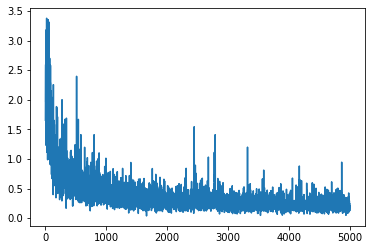

In [14]:
# Visualize learning (training loss)
import seaborn as sns
losses_float = [float(loss.cpu().detach().numpy()) for loss in losses] 
loss_indices = [i for i,l in enumerate(losses_float)] 
plt = sns.lineplot(loss_indices, losses_float)
plt

In [15]:
import pandas as pd 

# Analyze the results for one batch
test_batch = next(iter(test_loader))
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch) 
    df = pd.DataFrame()
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()
df["y_real"] = df["y_real"].apply(lambda row: row[0])
df["y_pred"] = df["y_pred"].apply(lambda row: row[0])
df

,y_real,y_pred
0,-6.637,-6.995487
1,-2.982,-3.237353
2,-2.060,-2.251452
3,-0.490,-0.571177
4,-0.972,-0.774131
...,...,...
123,-3.380,-3.198223
124,-4.286,-3.178186
125,-3.120,-2.272325
126,1.100,1.050579


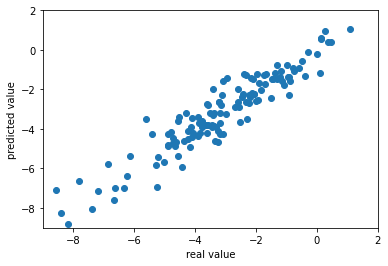

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['y_real'], df['y_pred'])
plt.ylim(-9,2)
plt.xlim(-9,2)
plt.xlabel('real value')
plt.ylabel('predicted value')
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

prct_error = mean_absolute_percentage_error(df["y_real"], df["y_pred"])
print("Absolute error percent of the model is: ", prct_error)

MSE = mean_squared_error(df["y_real"], df["y_pred"])
print("Mean squared error: ", MSE)

R_square = r2_score(df["y_real"], df["y_pred"])
print("R Squared Value: ", R_square)

Absolute error percent of the model is:  0.5045338401545941
Mean squared error:  0.4817582163437138
R Squared Value:  0.8768661969801965
